In [1]:
import time

import seabreeze.spectrometers as sb
#
import os
import math
import numpy as np
import matplotlib.pyplot as plt

# set graphics to be plotted in the notebook
%matplotlib inline

In [2]:
#spectrometer
#spec = sb.Spectrometer.from_serial_number("S15434") # STS-VIS serial number: S15434 
spec = sb.Spectrometer.from_serial_number("S03615") # STS-NIR serial number: S16128
# serial number
print (spec.serial_number)
# model
print (spec.model)
# number of pixels (as returned by seabreeze)
print (spec.pixels)

SeaBreezeError: No device attached with serial number 'S03615'.

In [3]:
#set integration time
micro_time=20 #us
spec.integration_time_micros(micro_time)

1123.5032598432654 634.06689453125


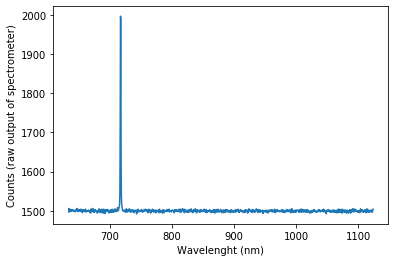

In [13]:
#spectrometer test
trial_num=1
trials=[]
for i_num in range(trial_num):
    wavelengths, intensities = spec.spectrum() # core function
    trials.append(intensities)
intensities=np.mean(trials,axis=0)
#
plt.plot(wavelengths,intensities)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
print (np.max(wavelengths),np.min(wavelengths))

In [14]:
#save
wave_int=np.zeros((len(wavelengths),2))
wave_int[:,0]=wavelengths
wave_int[:,1]=intensities
#np.savetxt('wave_int.txt', wave_int)
np.savetxt("710nm_no_pulsing_int.csv", wave_int, delimiter=",")